Imports 

In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt 
import pandas as pd  

Load Dataset 

In [2]:
# digit classification
# 60,000 training images
# 10,000 test images
# Each image is of a handwritten digit (0 to 9)
# Each image is 28x28 pixels in grayscale (values between 0–255)

(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()

Preprocessing 

In [3]:
# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test /255.0

In [4]:
# Reshape the data to fit the input layer of the neural network (flattening)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [5]:
print("Training data shape", x_train.shape)
print("Test data shape ", x_test.shape)

Training data shape (60000, 784)
Test data shape  (10000, 784)


Model Design 

In [6]:
# feed-forward neural network using Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [7]:
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Compilation and Training 

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.4741 - val_accuracy: 0.9599 - val_loss: 0.1337
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9644 - loss: 0.1198 - val_accuracy: 0.9671 - val_loss: 0.1089
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0729 - val_accuracy: 0.9724 - val_loss: 0.0932
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0541 - val_accuracy: 0.9697 - val_loss: 0.0998
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9753 - val_loss: 0.0893
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0324 - val_accuracy: 0.9737 - val_loss: 0.0900
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9722 - val_loss: 0.1018
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9932 - loss: 0.0217 - 

Accuracy Curves 

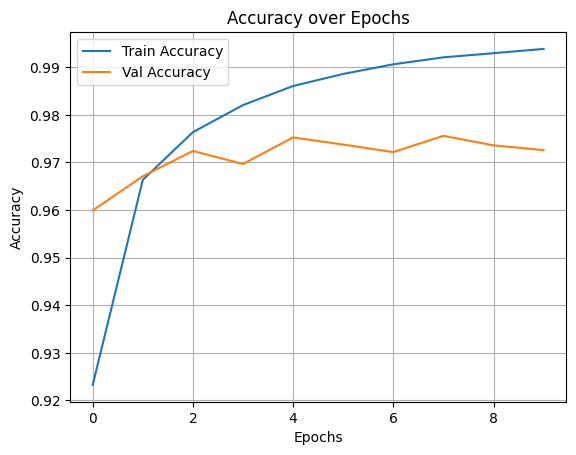

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label ='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Loss Plot 

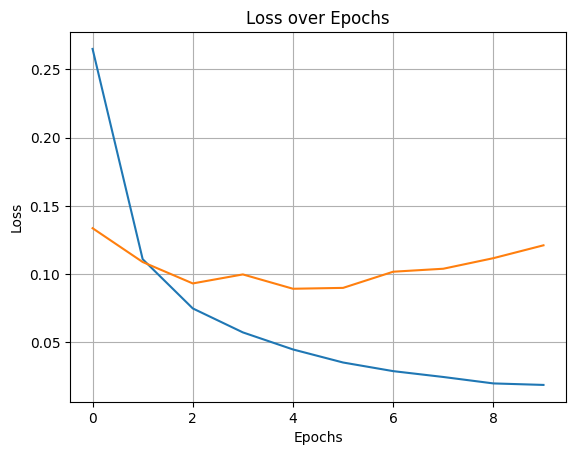

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Evaluation 

In [13]:
# DON'T use one-hot encoding
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')


Test Accuracy: 0.9750
Test Loss: 0.0983


In [14]:
import numpy as np 

# Predict classes for test data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Visualization 

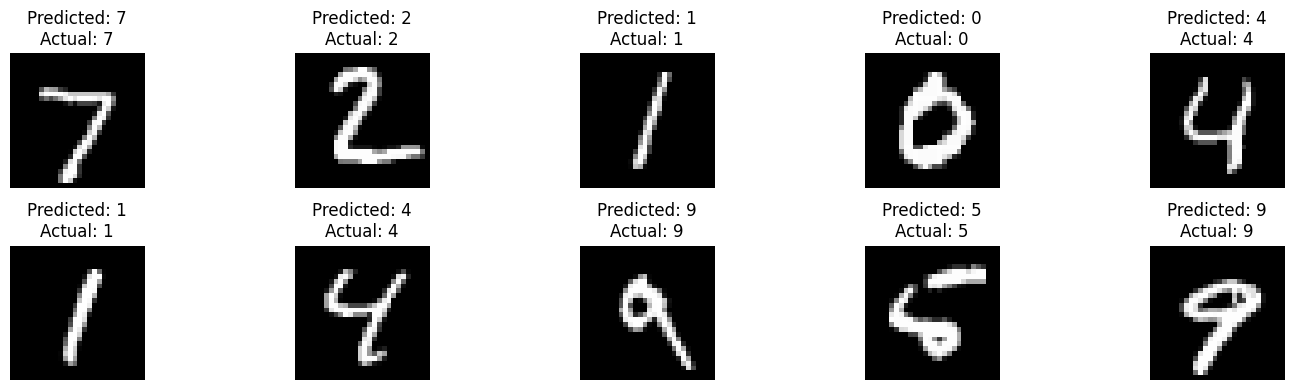

In [15]:
import matplotlib.pyplot as plt

# Show 10 test images with predicted and true labels
plt.figure(figsize=(15, 4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
model.save("mnist_cnn_model.h5")